## Final Project Submission

Please fill out:
* Student name: Sellah Otieno
* Student pace: part time 
* Scheduled project review date/time: 24/7/2023 -Midnight
* Instructor name: Moringa School
* Blog post URL:


## Project Deliverables

This project is designed to generate insights for a business stakeholder. Advise the business stakeholder on the types of films to create.


### Objectives: 
1)Create a Frequency Table of top ten created movie genres
2)Create a pie chart of top ten created movie genres
3)Creating a line plot to for the trend of annual domestic gross income over time
4)Creating a line plot to for the trend of annual foreign gross income over time

### Importing  relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading files
I open my file in pandas. Pandas dataframe are easily manipulated making it appropriate for data analysis.
since my file has the extension'.gz'i set the compression parameter to'gzip'.

In [2]:
movies_gross = pd.read_csv('bom.movie_gross.csv.gz', compression='gzip')

### Data Exploration
familiarizing with the data

In [3]:
# visually inspect the first 5 rows
movies_gross.head(5)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
# visually inspect the last 5 rows
movies_gross.tail(5)

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [5]:
# we check the number of columns and rows
movies_gross.shape

(3387, 5)

In [6]:
#checking for names of the columns
movies_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [7]:
#previewing a sample of the data
movies_gross.sample(5)

,title,studio,domestic_gross,foreign_gross,year
1430,Becoming Traviata,Distrib.,62700.0,NaN,2013
2020,Macbeth (2015),Wein.,1100000.0,15200000,2015
2638,Tumbledown,SM,135000.0,NaN,2016
2252,Kindergarten Teacher,KL,36200.0,NaN,2015
1051,Shirin Farhad Ki Toh Nikal Padi,Eros,156000.0,NaN,2012


In [8]:
movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


From the above cell i have gathered that the data has 3387 rows. 
Reviewing the information about the columns, i can confidently state that columns studio, domestic_gross and foreign_gross have missing values.
When reviewing the data foreign_gross is in numbers. However, while checking the type we get an object type instead of float.

In [9]:
#we check for measures of central tendency for numerical data
movies_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


### review of above cell
From the above cell i have gathered column year is in the wrong data type as it is not a numeric, and does not qualify to be performed on measures of central tendecy search as mean.etc

### Data Cleaning & Preprocessing
I now correct the  discrepancies in our data. This includes correcting for duplicated entries,missing data and invalid data.

In [10]:
# we remove "," from values of our domestic_gross & foreign_gross columns. This is to avoid the values to be read as string
movies_gross['domestic_gross'].replace(",","", inplace=True, regex=True)
movies_gross['foreign_gross'].replace(",","", inplace=True, regex=True)


In [11]:
# foreign_gross column should be a numeric as it holds a number we therefore change from object to type float
movies_gross['foreign_gross'] = movies_gross['foreign_gross'].astype('float')
movies_gross['year'] = movies_gross['year'].astype('str')
movies_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year               object
dtype: object

In [12]:
# we look for the missing values for each column
sum_missing_values = movies_gross.isna().sum()
sum_missing_values

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [13]:
# checking for percentage of each missing value in relation to the total data available
total_data = movies_gross.shape[0]
# percentage missing value for each column is calculated by dividing sum of each column by len of the whole data
percentage_missing_values = sum_missing_values/total_data *100
#creating a dataframe with the above infor and assign it missing_values_df
missing_values_df =pd.DataFrame({
      'missing values':sum_missing_values,
      'percentage missing values':percentage_missing_values
})
missing_values_df

,missing values,percentage missing values
title,0,0.000000
studio,5,0.147623
domestic_gross,28,0.826690
foreign_gross,1350,39.858282
year,0,0.000000


domestic_gross and foreign_gross columns have percentage of missing values of "0.82%" and"39.86%) of the total data respectively.
The two percentages are way below they will not have a substantive effect on my analysis.
Assumming that the two columns represent foreign & domestic gross income earned by each movie.
my assumption is that the values with missing values in domestic gross column represent zero income earned.
For Foreign_gross column which has 39% of missing data we replace with mean of the data.

In [14]:
#filling missing values in foreign_gross and domestic_gross columns with "0"
#after filling values we again check to confirm for missing values

movies_gross['domestic_gross'].replace(np.nan, 0, inplace=True, regex=False)
movies_gross['foreign_gross'].fillna(movies_gross['foreign_gross'].mean(), inplace=True)
sum_missing_values = movies_gross.isna().sum()
sum_missing_values

title             0
studio            5
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [15]:
# we can also drop the rows where the names of the studio are missing
# we specify the column by using the subset and use axis = 0 to specify we are dropping rows

movies_gross.dropna(axis = 0, subset =['studio'], inplace=True)
sum_missing_values = movies_gross.isna().sum()
sum_missing_values

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

### Check for duplicates

In [16]:
#counting the number of duplicates
duplicated_rows = movies_gross.duplicated().sum()
duplicated_rows

0

From above we can confirm that the data has no duplicates.

### checking for Unwanted observation
##### Checking for outliers
The  dataset contains columns with numeric data. 
i review the data to check whether the dataset has extreme datapoints
This can be done visually by ploting a boxplot or by calculating using Interquartile Range
Import the necessary libraries for boxplot

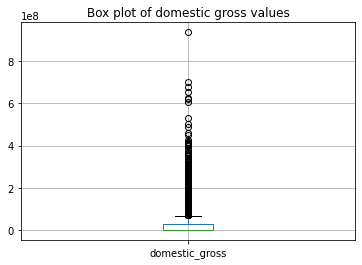

In [17]:
# using visualization to check for 
plt.figure()
ax=movies_gross.boxplot(column = 'domestic_gross') 
ax.set_title('Box plot of domestic gross values')
plt.suptitle('')
plt.show()
#numeric_columns = ['domestic_gross', 'foreign_gross']
#movies_gross.boxplot(column = numeric_columns)

from the cell above, both foreign gross & domestic gross columns outliers

In [18]:
#going by the above cells the columns have outliers
# i create a function to remove outliers
def remove_outliers_movies(movies_gross,column):
    Q1=movies_gross[column].quantile(0.25)
    Q3=movies_gross[column].quantile(0.75)
    IR=Q3-Q1
    lower_bound =Q1 - 1.5*IR
    upper_bound =Q3 + 1.5*IR
    return movies_gross[(movies_gross[column]>= lower_bound) & (movies_gross[column]<=upper_bound)]
# i am interested in removing outliers from the two numerical columns
numeric_columns = ['domestic_gross','foreign_gross']
for column in numeric_columns:
    filtered_movies_gross = remove_outliers_movies(movies_gross,column)

<AxesSubplot:>

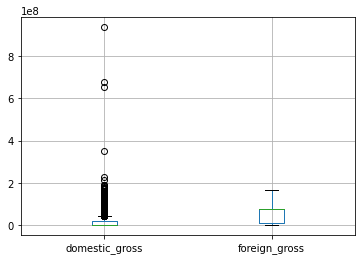

In [19]:
# we now plot the box plot to confirm that the outliers have been removed
numeric_columns = ['domestic_gross', 'foreign_gross']
filtered_movies_gross.boxplot(column = numeric_columns)

### Loading files
loading of the ratings data. The file has gz extension, we therefore use gzip

In [20]:
ratings = pd.read_csv('imdb.title.ratings.csv.gz', compression='gzip')

### Data Exploration
familiarizing with the ratings data

In [21]:
# visually inspect the first 5 rows
ratings.head(5)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [22]:
# visually inspect the last 5 rows
ratings.tail(5)

,tconst,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [23]:
# we check the number of columns and rows
ratings.shape

(73856, 3)

from above cell we have identified that the ratings data has 73856 rows and 3 columns

In [24]:
#previewing a sample of the data
ratings.sample(5)

,tconst,averagerating,numvotes
47311,tt6135036,6.9,459
55101,tt2290623,7.7,31
29864,tt6821206,7.2,5
60330,tt6113666,6.3,10
37422,tt7422034,8.2,5


In [25]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


The outpout from above cell indicates that the ratings data does not have any missing values. We note that the number of non-null values in all the three columns are consistent with the number of rows in the dataset.
The cell also indicates that averagerating is of typer float and numvotes is type integer.

In [26]:
#we check for measures of central tendency for numerical data
ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


### Data Cleaning & Preprocessing


In [27]:
# verying that the data has no missing values;
# assign the sum of missing values a variable called sum_missing_ratings
sum_missing_ratings = ratings.isna().sum()
sum_missing_ratings

tconst           0
averagerating    0
numvotes         0
dtype: int64

The above cell verifies that there are no missing  values in our ratings data.

### Checking for duplicates

In [28]:
# we sum the number of duplicate values in each row
# we assign the duplicate values a  variable called sum_duplicated_ratings
sum_duplicated_ratings = ratings.duplicated().sum()
sum_duplicated_ratings

0

In [29]:
#looking for any unwanted elements in the data. 
# the numeric columns might have commas(,) in the data set. This might make the data be read as a string yet it is not.
# checking for commas and replacing them.
ratings['averagerating'].replace(",","", inplace=True, regex=True)
ratings['numvotes'].replace(",","", inplace=True, regex=True)


### Checking for outliers
The ratings dataset contains columns with numeric data. 
i review the data to check whether the dataset has extreme datapoints
This can be done visually by ploting a boxplot or by calculating using Interquartile Range


<AxesSubplot:>

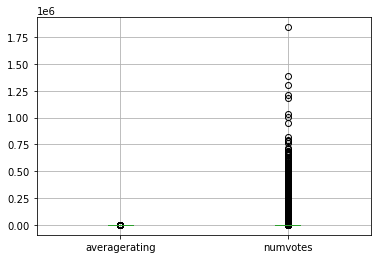

In [30]:
#using visualization to check for outliers
num_columns = ['averagerating', 'numvotes']
ratings.boxplot(column = num_columns)

From the blox plot above, both the columns have outliers.
we use interquartile range code to remove outliers in the dataset

In [31]:
# removing outliers using the interquartile range
def remove_outliers_ratings(ratings,column):
    first_quarter=ratings[column].quantile(0.25)
    third_quarter=ratings[column].quantile(0.75)
    ir=third_quarter - first_quarter
    low_bound =first_quarter - 1.5*ir
    up_bound =third_quarter + 1.5*ir
    return ratings[(ratings[column]>= low_bound) & (ratings[column]<=up_bound)]
# i am interested in removing outliers from the two numerical columns
num_columns = ['averagerating', 'numvotes']
for column in num_columns:
    filtered_ratings = remove_outliers_ratings(ratings,column)

<AxesSubplot:>

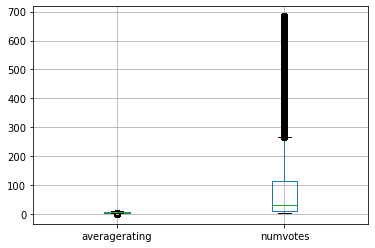

In [32]:
# again visualize the data by plotting a box plot to confirm that i have removed all outliers
num_columns = ['averagerating', 'numvotes']
filtered_ratings.boxplot(column = num_columns)

### Loading files
We load the file and assign the data the variable (title_basics). The file has gz extension, we therefore use gzip

In [33]:
title_basics = pd.read_csv('imdb.title.basics.csv.gz', compression='gzip')

### Data Exploration
familiarizing with the ratings data

In [34]:
# visually inspect the first 5 rows
title_basics.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [35]:
# visually inspect the last 5 rows
title_basics.tail(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [36]:
# we check the number of columns and rows
title_basics.shape

(146144, 6)

The title_basics dataset has 146144 rows and 6 columns.

In [37]:
#previewing a sample of the data
title_basics.sample(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
61341,tt3543922,Muñecas Ciegas,Muñecas Ciegas,2013,86.0,Horror
111066,tt6484954,The Mystery of Green Hill,Uzbuna na Zelenom Vrhu,2017,81.0,Family
29449,tt2128699,The Quarry: 2011,The Quarry: 2011,2011,73.0,Horror
36984,tt2343747,The Arriviste,The Arriviste,2012,93.0,Crime
129035,tt7950968,Banamathi,Banamathi,2014,139.0,Drama


In [38]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


The above cell indicates that columns original_title, runtime_minutes and genres have missing values.

In [39]:
title_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


### Data Cleaning & Preprocessing


In [40]:
# we check commas from the data and remove "," from values of our runtime_minutes column. 
#This is to avoid the values being read as string
title_basics['runtime_minutes'].replace(",","", inplace=True, regex=True)


In [41]:
# we look for the missing values for each column using isna function
sum_missing_basics = title_basics.isna().sum()
sum_missing_basics

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

Findings above indicate that columns original_title has 21 missing values, runtime_minutes has 31739 missing values and genres has 5408 missing values

In [42]:
# checking for percentage of each missing value in relation to the total data available
total_data = title_basics.shape[0]
# percentage missing value for each column is calculated by dividing sum of each column by len of the whole data
percentage_missing_basics = sum_missing_basics/total_data *100
#creating a dataframe with the above infor and assign it missing_values_df
missing_basics_df =pd.DataFrame({
      'missing values':sum_missing_basics,
      'percentage missing values':percentage_missing_basics
})
missing_basics_df

,missing values,percentage missing values
tconst,0,0.000000
primary_title,0,0.000000
original_title,21,0.014369
start_year,0,0.000000
runtime_minutes,31739,21.717621
genres,5408,3.700460


### Observation
The original_title column has percentage of missing values of "0.014" of the total data.
The runtime_minutes column represent a percentage of " 21.71" of missing values of the total data.
The genre column has missing values of "3.7" of the total data

### Assumptions
From my external research movies have different titles in different countries and languages. This is allow the audience to resonate with the movie. In this case my assumption is the original titles that are missing have the same title in different countries, therefore original title is the same as the primary title. Given the small percentage of the missing values,this will not have a susbstansive effect on analysis.

runtime_minutes represents the length or the duration of the movie. The column has a small 21.71 % of missing values in the whole data. I replace with average duration of a movie.

genre are stylistic categories that organize a movie based on a certain criteria. The genre will be where most of the content of the movie is. My assumption is that the characteristics of the movies with missing values cannot be be placed in a specific category. In this case i will replace the blanks with "nongenre"

In [43]:
# i use replace function to replce and fillna function to fill the missing values
title_basics['original_title'].fillna(title_basics['primary_title'], inplace=True)
title_basics['runtime_minutes'].fillna(title_basics['runtime_minutes'].mean(), inplace=True)
title_basics['genres'].replace(np.nan, 'non-genre', inplace=True)

# we again check to confirm there are no missing values
sum_missing_basics = title_basics.isna().sum()
sum_missing_basics

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

From the above cell, there are no missing values

### Checking for duplicates

In [44]:
# checking the duplicates using duplicated() function
# summing the number of duplicates using sum() function
# we assign the sum of duplicate values a  variable called sum_duplicated_basics
sum_duplicated_basics = title_basics.duplicated().sum()
sum_duplicated_basics

0

From the above cell, the data does not have duplicated values.

### Checking for outliers 
Since the data has numeric values, I review the data to check whether the dataset has extreme datapoints
This can be done visually by ploting a boxplot or by calculating using Interquartile Range

<AxesSubplot:>

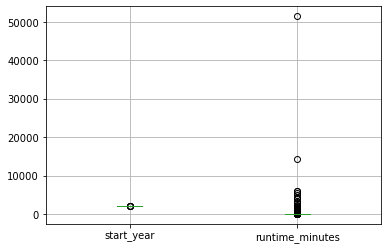

In [45]:
# using boxplot to visualize outliers
nums_column = ['start_year', 'runtime_minutes']
title_basics.boxplot(column = nums_column)

From above cell it is evident that the title_basics data has extreme data points.

In [46]:
# removing outliers using the interquartile range
# i will only remove from runtime_minutes columns
def remove_outliers_basics(title_basics,column):
    first_quarter=title_basics[column].quantile(0.25)
    third_quarter=title_basics[column].quantile(0.75)
    ir=third_quarter - first_quarter
    low_bound =first_quarter - 1.5*ir
    up_bound =third_quarter + 1.5*ir
    return title_basics[(title_basics[column]>= low_bound) & (title_basics[column]<=up_bound)]
# i am only interested in removing outliers from the numerical columns
num_cols = ['start_year','runtime_minutes']
for column in num_cols:
    filtered_title_basics = remove_outliers_basics(title_basics,column)

<AxesSubplot:>

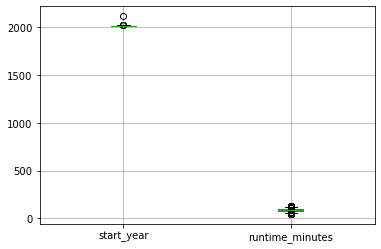

In [47]:
filtered_title_basics.boxplot(column = num_cols)

From the above cell, i have now removed all the outliers in my columns

In [48]:
#Merging filtered ratings & filtered title basics on column tconst
# I assign the varriable first_merge
first_merge = pd.merge(filtered_title_basics, filtered_ratings, on='tconst')
first_merge.iloc[2000]
#first_merge.iloc[:,[5,7]]
#first_merge_sorted = first_merge.sort_values(by='numvotes', ascending=False)
#first_merge_sorted.iloc[:,[3,7]]

tconst                               tt1479361
primary_title      Shiniyuku tsuma tono tabiji
original_title     Shiniyuku tsuma tono tabiji
start_year                                2011
runtime_minutes                            113
genres                                   Drama
averagerating                              5.6
numvotes                                     7
Name: 2000, dtype: object

### Creating a frequency table for the top ten genres

In [49]:
# i create a list with unique genres
unique_genres = first_merge['genres'].unique().tolist()
unique_genres.sort()

# create a dictionary called genres_frequencies 
# keys are the unique genres  
#values are the number of times the genre appears in the entire dataframe
genres_frequencies = first_merge['genres'].value_counts().to_dict()

The above shows the genres_frequencied dictionary has been successfully been converted into a Dataframe.

In [50]:
# plotting distribution of the top ten unique genres
# i first convert the genres_frequency into a data frame and name it genres_df
genres_df = pd.DataFrame(list(genres_frequencies.items()), columns=['Genre', 'Frequency'])
genres_df.head(2)

,Genre,Frequency
0,Drama,9907
1,Documentary,9462


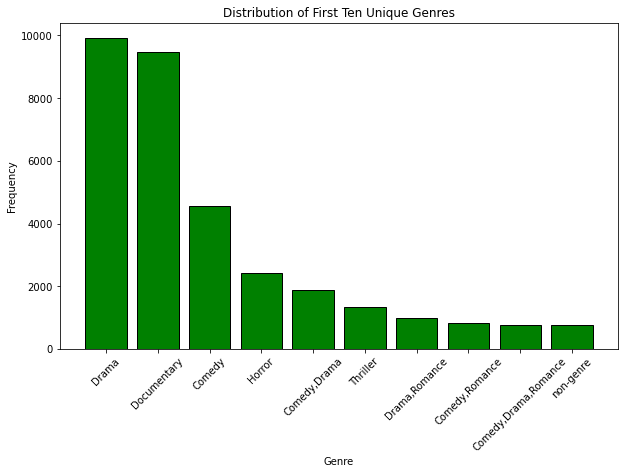

In [51]:
# sinces pandas are using arranged in descending order  i select the first ten rows
top_ten_genres_df = genres_df.head(10)
top_ten_genres_df

# i now plot the distribution of first ten unique genres
# i have rotated the x_axis for better readability
# i have also specified the color of bars to be green and the edge to be black
plt.figure(figsize=(10, 6))
bars = plt.bar(top_ten_genres_df['Genre'], top_ten_genres_df['Frequency'], color='green', edgecolor='black')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Distribution of First Ten Unique Genres')
plt.xticks(rotation=45)
plt.show()

From the above bar plot i can state that movies in the genre Drama is the most common, followed by Documentary and Comedy is third placed. Movies that have characteristics of comedy & romance all in one placed on the eighth position while those with a mixture of comedy.Drama and Romance are placed ninth.

### Distribution of the first ten genre as a percentage
I now plot a pie-chart to showcase the distribution of the first ten genres and their corresponding percentages.
I have specified that the pie chart display the percentages in one decimal point using (autopct='%1.1)

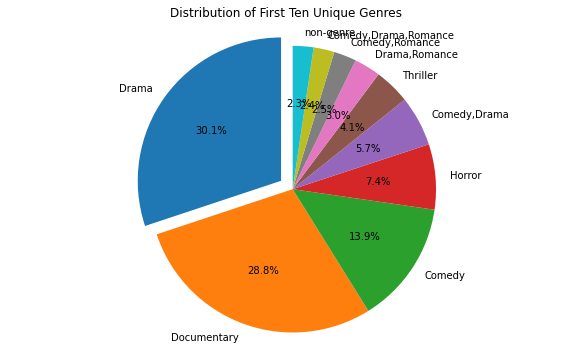

In [52]:
plt.figure(figsize=(10, 6)) # this represents the size of the pie-chart
plt.pie(top_ten_genres_df['Frequency'], labels=top_ten_genres_df['Genre'], autopct='%1.1f%%', startangle=90, explode=[0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
plt.title('Distribution of First Ten Unique Genres')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The pie chart presentation above shows that among the top ten movies genres.

Over the years movies produced in the Drama genre have the largest share with a percentage of 30.1%, follwed closely with Documentaries with a share of 28.8 % and Comedy being the 3rd with a percentage.

Movies that have characteristics of comedy, Drama and romance all in one were ranked 9th with a percentage of 2.4% while those that have characteristics of comedy and romance were ranked 8th with a percentage of2.%.

From the observation above producers like to produce movies in one genre and compared to movies with a mix of characteristics.

### Investing the trend of annual domestic gross income and annual foreign gross income.
To get gross income both in the domestic and foreign markets i group the filtered movies gross dataframe by year then get the sum of each market earned each year.
Then i assign it  a variable called yearly income.
I rest the index so as to include the year column into the dataframe.

In [53]:
yearly_income = filtered_movies_gross.groupby(filtered_movies_gross['year']).sum().reset_index()
yearly_income.head(2)

,year,domestic_gross,foreign_gross
0,2010,5.398829e+09,6.949077e+09
1,2011,6.178488e+09,1.531120e+10


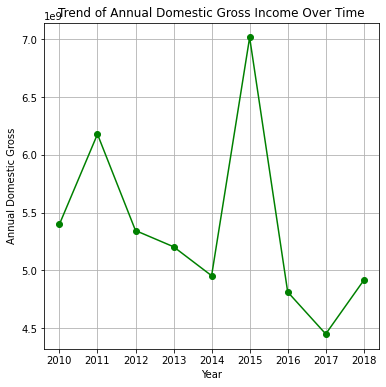

In [54]:
# Creating a line plot to visualize the trend of 'annual_domestic_gross' over time
plt.figure(figsize=(6, 6))
plt.plot(yearly_income['year'], yearly_income['domestic_gross'], marker='o', linestyle='-', color ='green')
plt.xlabel('Year')
plt.ylabel('Annual Domestic Gross')
plt.title('Trend of Annual Domestic Gross Income Over Time')
plt.grid(True)
plt.show()

from the line plot above the total annual domestic gross income rose from year 2010 to 2011. 

Then the gross income earned from domestic market has been decreasing from year 2011 all through to year 2014.

There was a sharp increase in the year2015 then another steady decline in the year 2016.

The decline continued to year 2017.

In the year 2018 the domestic market experienced increased gross income.

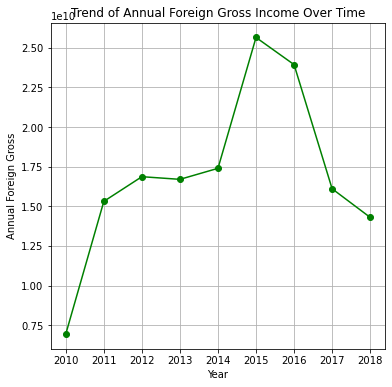

In [55]:
# Creating a line plot to visualize the trend of 'annual_foreign_gross' over time
plt.figure(figsize=(6, 6))
plt.plot(yearly_income['year'], yearly_income['foreign_gross'], marker='o', linestyle='-', color='green')
plt.title('Trend of Annual Foreign Gross Income Over Time')
plt.xlabel('Year')
plt.ylabel('Annual Foreign Gross')
plt.grid(True)
plt.show()

From the above line plot, The gross income earned from foreign market has been increasing from year 2010 to year2012. The income declined in the year 2013. It then increased in the year 2014 and reached its all time highest in the year 2015.
From 2015 the foreign gross income has been decreased all through to year 2018.

### Conclusion 
The analysis done show that movies from Drama genres were the most produced followed by Documentary the Comedy.

When looking at the market share of the different movies genre. Drama has the largest percentage. Drama enjoys  a share of 30.1 % followed by Documentary by 28.8% and documentary which enjoys 13.9%.

The  Analysis also indicate that gross income earned from both documestic and foreign market are not consistent. It increases and decreases.

From the analysis the Business stakeholder is  can venture into creating movies of genres Drama, Documentary and Comedy given the market the three enjoy.The three enjoy a market of upto 72.8%.

The Business should target both Foreign and domestic markets to cussion themselves from uncertainities and also to diversify their risk.